In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

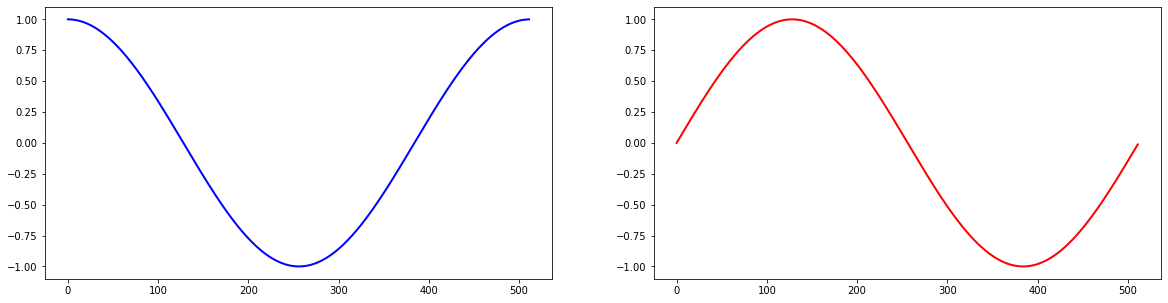

In [3]:
def plot_basis(t, x_re, x_im):
    plt.figure(figsize = (20,5))
    plt.subplot(121)
    plt.plot(t, x_re, lw = 2, color = 'blue')
    plt.subplot(122)
    plt.plot(t, x_im, lw = 2, color = 'red')
    
    
N = 512
t = np.arange(0,N)
    
k = 1
x_re = np.cos(k*t*2*np.pi/N)
x_im = np.sin(k*t*2*np.pi/N)
    
plot_basis(t, x_re, x_im)    

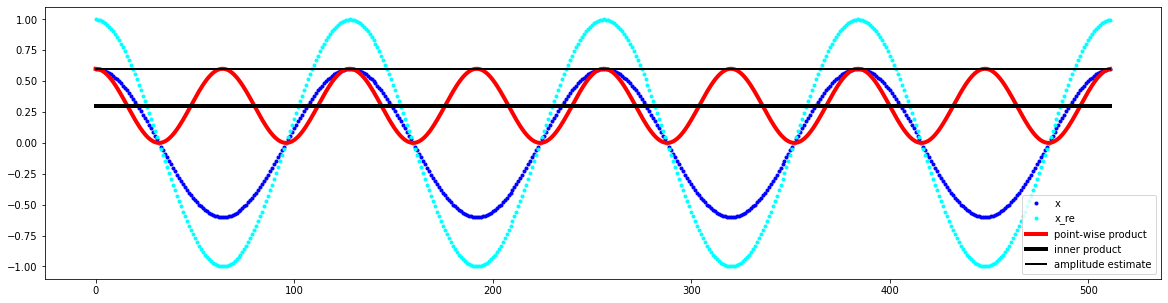

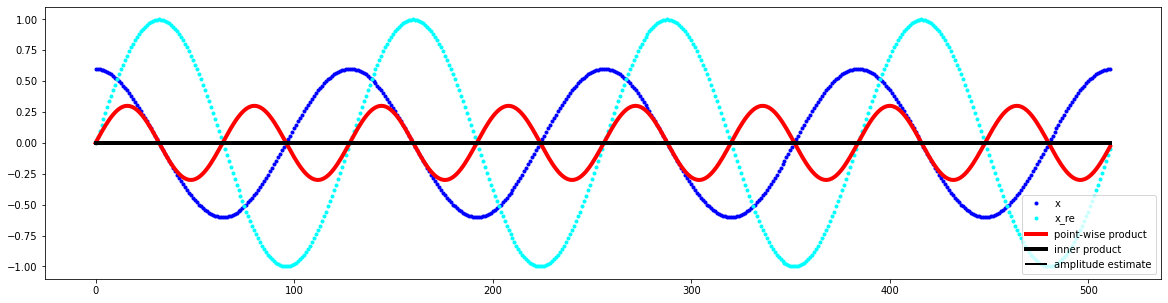

In [5]:
#The estimated amplitude is twice the inner product because the basis functions have amplitude equal to 1

def plot_product(t,x1,x2): 
    prod = np.multiply(x1,x2)
    inner_prod = np.sum(prod) / len(prod)
    plt.figure(figsize=(20,5))
    plt.plot(t, x1,'.', lw=1, color='blue')
    plt.plot(t, x2,'.', lw=1, color='cyan')
    plt.plot(t, np.multiply(x1,x2), lw=4, color='red')
    ip_line = np.empty(len(prod))
    ip_line.fill(inner_prod)
    plt.plot(t, ip_line, lw=4, color='black')
    plt.plot(t, ip_line*2, lw=2, color='black')
    plt.legend(('x', 'x_re', 'point-wise product', 'inner product', 'amplitude estimate'), loc='lower right')
    

k=4 
a = 0.6
x = a * np.cos(k*t*2*np.pi/N)
x_re = np.cos(k*t*2*np.pi/N)
x_im = np.sin(k*t*2*np.pi/N)
plot_product(t,x,x_re)
plot_product(t,x,x_im)

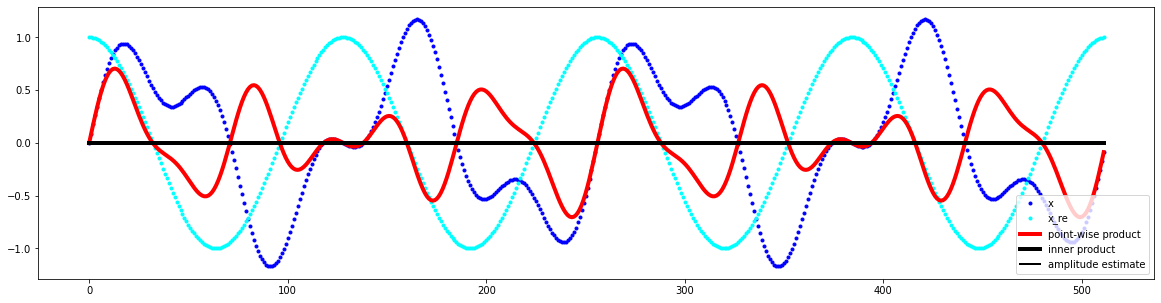

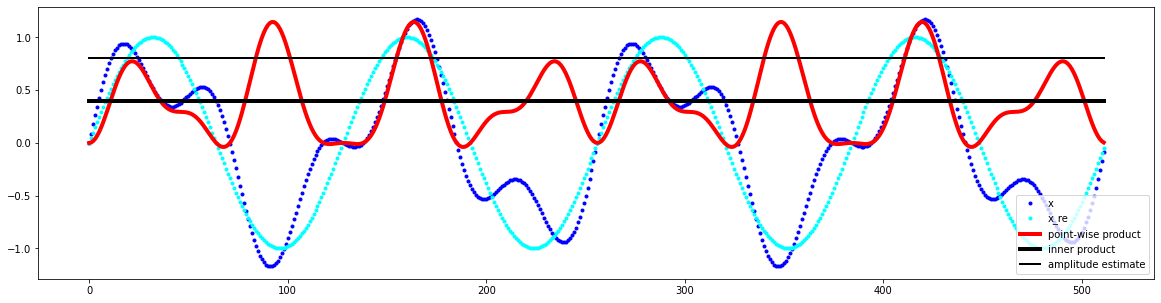

In [6]:
#Estimating the amplitude of the desired sinusoid in the mixture signal

k=4
a1 = 0.8 
x1 = a1 * np.sin(k*t*2*np.pi/N)
a2 = 0.4 
k = 10 
x2 = a2 * np.sin(k*t*2*np.pi/N)
x = x1+x2
plot_product(t,x,x_re)
plot_product(t,x,x_im)

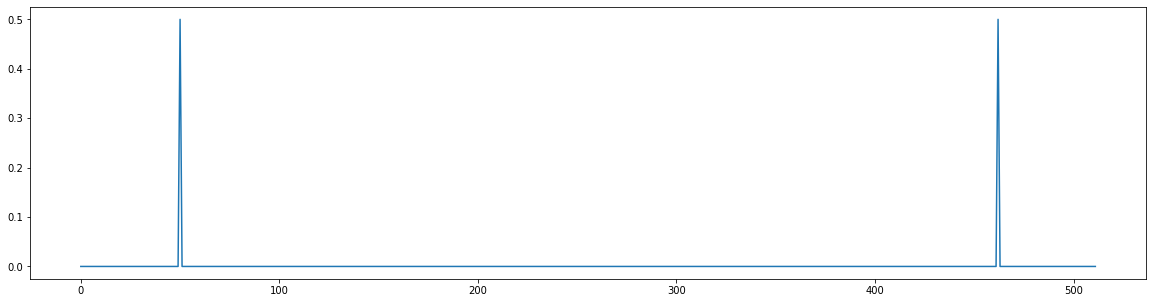

In [7]:
#Coding inefficient DFT 
def pedagogical_dft(x, N):
    X_re = np.zeros(N)
    X_im = np.zeros(N)
    for k in np.arange(0, N):
        for t in np.arange(0, N):
            X_re[k] += x[t] * np.cos(k*t*2*np.pi/N)
            X_im[k] += x[t] * np.sin(k*t*2*np.pi/N)
            
    return (X_re, X_im)

def plot_mag_spectrum(Xmag):
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)

N = 512 
n = np.arange(0,N)

# Single sinusoid 
k=50
x1 = 0.5 * np.sin(k*n*2*np.pi/N)

(X_re, X_im) = pedagogical_dft(x1, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) /N
plot_mag_spectrum(Xmag)



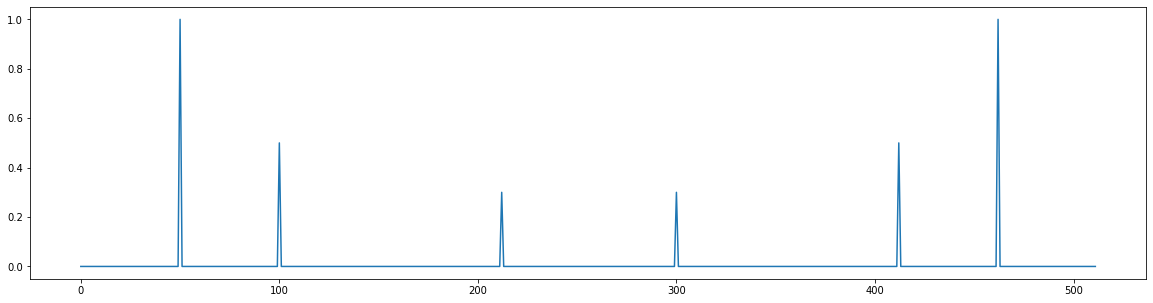

In [8]:
# Mixture sinusoid input 
x2 = np.sin(50*n*2*np.pi/N) + 0.5 * np.sin(100 * n * 2 * np.pi/N) + 0.3 * np.sin(300 * n * 2 * np.pi/N)

(X_re, X_im) = pedagogical_dft(x2, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) / N 
plot_mag_spectrum(Xmag)
        

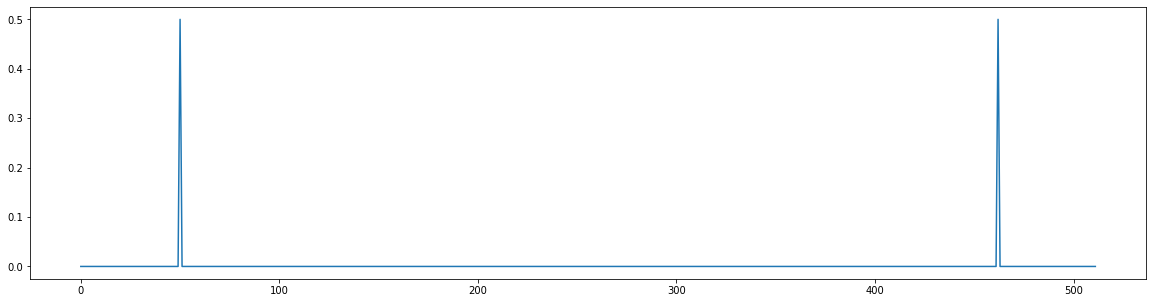

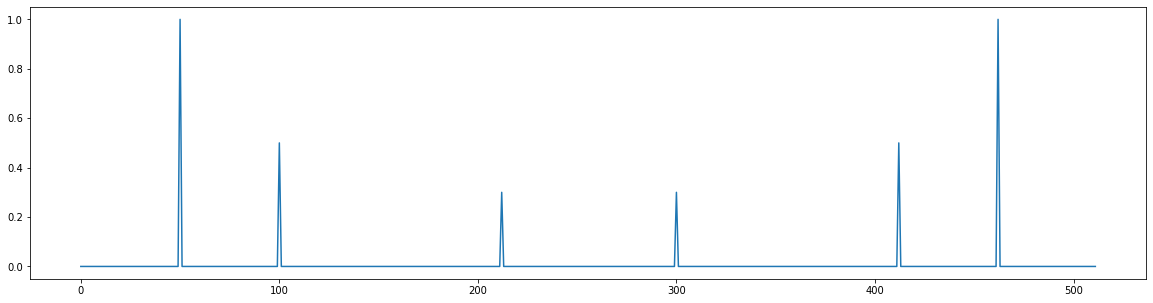

In [9]:
#The library implementation of FFT. The computation is much faster

X = np.fft.fft(x1)
Xmag = 2 * np.abs(X) / N 
plot_mag_spectrum(Xmag)

X = np.fft.fft(x2)
Xmag = 2 * np.abs(X) / N 
plot_mag_spectrum(Xmag)

In [10]:
%%time
import numpy as np
import timeit 


def pedagogical_dft(x, N):         
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N):
        
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos(t * k * 2 * np.pi / N)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * k * 2 * np.pi / N)   # inner product with imaginary basis k
    return (X_re, X_im)

def test(): 
    x = np.zeros(512)
    pedagogical_dft(x,512)

test()

CPU times: user 2.66 s, sys: 3.46 ms, total: 2.66 s
Wall time: 2.66 s
